#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased)


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [1]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question:
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping.
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.



### Answer:
Before unzip, the size of collobert_embeddings.txt.zip is 24,275 Kb; and glove.6B.50d.txt.zip is 67,618 Kb.

### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question:
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [4]:
# Charger les mots à partir du fichier collobert_words.lst en utilisant open et readlines
with open('data/collobert_words.lst', 'r') as file:
    words = file.readlines()

import numpy as np

embeddings = np.genfromtxt('data/collobert_embeddings.txt', encoding='latin-1')



# Vérifier que le nombre de mots et de vecteurs correspond
if len(words) == embeddings.shape[0]:
    print(f"Les tailles correspondent : {len(words)} mots et {embeddings.shape[0]} vecteurs.")
else:
    print(f"Erreur : Nombre de mots ({len(words)}) et de vecteurs ({embeddings.shape[0]}) ne correspondent pas.")




Les tailles correspondent : 130000 mots et 130000 vecteurs.


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches.

#### Question
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [5]:
from scipy.spatial import KDTree

# Initialiser la structure KDTree avec les vecteurs d'embeddings
tree = KDTree(embeddings)

# Liste des mots à tester
test_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']

# Créer une liste words_plus_neighbors
words_plus_neighbors = []

# Trouver et afficher les 5 mots les plus proches pour chaque mot de test
for word in test_words:
    # Obtenir l'indice du mot dans la liste des mots
    index = words.index(word + '\n')  # Ajouter '\n' pour correspondre à l'élément dans la liste

    # Trouver les 5 voisins les plus proches du mot
    distances, indices = tree.query(embeddings[index], k=6)  # 6 car le mot lui-même est inclus

    # Ajouter les voisins à la liste words_plus_neighbors
    neighbors = [words[i].strip() for i in indices]
    words_plus_neighbors.append((word, neighbors[1:]))  # Exclure le mot lui-même

    # Afficher les résultats
    print(f"Pour le mot '{word}', les 5 voisins les plus proches sont : {neighbors[1:]}")

# Afficher la liste words_plus_neighbors
print("\nListe des mots et de leurs voisins :")
for word, neighbors in words_plus_neighbors:
    print(f"{word}: {neighbors}")



Pour le mot 'mother', les 5 voisins les plus proches sont : ['daughter', 'wife', 'father', 'husband', 'son']
Pour le mot 'computer', les 5 voisins les plus proches sont : ['laptop', 'multimedia', 'desktop', 'software', 'wiki']
Pour le mot 'dentist', les 5 voisins les plus proches sont : ['pharmacist', 'midwife', 'physician', 'housekeeper', 'veterinarian']
Pour le mot 'war', les 5 voisins les plus proches sont : ['revolution', 'death', 'court', 'independence', 'history']
Pour le mot 'president', les 5 voisins les plus proches sont : ['governor', 'chairman', 'mayor', 'secretary', 'senator']
Pour le mot 'secretary', les 5 voisins les plus proches sont : ['minister', 'treasurer', 'chairman', 'commissioner', 'undersecretary']
Pour le mot 'nurse', les 5 voisins les plus proches sont : ['physician', 'veterinarian', 'dentist', 'surgeon', 'midwife']

Liste des mots et de leurs voisins :
mother: ['daughter', 'wife', 'father', 'husband', 'son']
computer: ['laptop', 'multimedia', 'desktop', 'softw

### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

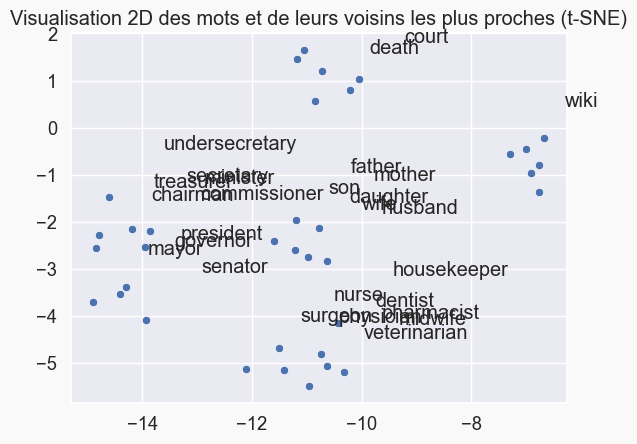

In [6]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Récupérer tous les vecteurs associés à words_plus_neighbors
unique_words = set()
for word, neighbors in words_plus_neighbors:
    unique_words.add(word)
    unique_words.update(neighbors)

# Supprimer les éventuels '\n' dans la liste des mots
word_to_index = {w.strip(): i for i, w in enumerate(words)}

# Extraire les vecteurs correspondant aux mots sélectionnés
word_vectors = np.array([embeddings[word_to_index[w]] for w in unique_words])

# 2. Créer l'objet tSNE
tsne = TSNE(random_state=0, n_iter=2000, perplexity=15.0)

# 3. Appliquer la transformation tSNE
T = tsne.fit_transform(word_vectors)

# 4. Créer une correspondance entre index et mot
labels = list(unique_words)

# 5. Affichage avec seaborn
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

sns.set(rc={'figure.figsize': (14, 8)})
sns.set(font_scale=1.2)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords='offset points')

plt.title("Visualisation 2D des mots et de leurs voisins les plus proches (t-SNE)")
plt.show()


### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words.

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library:
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question:
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.



In [8]:
!pip install --force-reinstall numpy==1.24.4 scipy==1.10.1 gensim==4.3.1 --user


  Obtaining dependency information for numpy==1.24.4 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Obtaining dependency information for scipy==1.10.1 from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Obtaining dependency information for gensim==4.3.1 from https://files.pythonhosted.org/packages/b2/cd/de59ef20e82402a320b574cbde40d559e916d2436ea9871b3e03efbfa09f/gensim-4.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached gensim-4.3.1-cp311-cp311-win_amd64.whl.metadata (8.5 kB)
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/7a/18/9a8d9f01957aa1f8bbc5676d54c2e33102d247

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.


## Warnings : restart the kernel !

In [3]:
from gensim.models import KeyedVectors

embedding_file = "data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")

print(f"Number of words : {len(model.key_to_index)}")
print(f"Dimension of vectors : {model.vector_size}")


Number of words : 155562
Dimension of vectors : 200


In [4]:
import os

file_path = "data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
size_bytes = os.path.getsize(file_path)
size_megabytes = size_bytes / (1024 * 1024)
print(f"File size: {size_megabytes:.2f} MB")


File size: 120.21 MB


**Answer: The size of the file is  120.21 MB**


#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it.

#### Question:
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [5]:
# Example 1: Nearest neighbors to "chevalier"
print("Mots les plus proches de 'chevalier' :")
print(model.most_similar("chevalier"))

# Example 2: Nearest neighbors to "yokohama"
print("\nMots les plus proches de 'yokohama' :")
print(model.most_similar("yokohama"))

# Example 3: Nearest neighbors to "kanto"
print("\nMots les plus proches de 'kanto' :")
print(model.most_similar("kanto"))

# Example 4: Nearest neighbors to "shamisen"
print("\nMots les plus proches de 'shamisen' :")
print(model.most_similar("shamisen"))

Mots les plus proches de 'chevalier' :
[('commandeur', 0.6844523549079895), ('chevaliers', 0.6799763441085815), ('écuyer', 0.6333731412887573), ('grand-croix', 0.621898353099823), ('preux', 0.6011075377464294), ('chevalerie', 0.5404021143913269), ('légion', 0.5335969924926758), ('honneur', 0.4953608810901642), ('yvain', 0.4855087101459503), ('insignes', 0.4742659330368042)]

Mots les plus proches de 'yokohama' :
[('tokyo', 0.7117858529090881), ('tôkyô', 0.6314416527748108), ('japon', 0.621522068977356), ('nagoya', 0.6198478937149048), ('kyushu', 0.6141085028648376), ('osaka', 0.6123895645141602), ('fukuoka', 0.5612888932228088), ('japonaise', 0.5507326126098633), ('sendai', 0.5496150255203247), ('japonais', 0.5391373038291931)]

Mots les plus proches de 'kanto' :
[('pokémon', 0.5426285266876221), ('mewtwo', 0.5076008439064026), ('pokémons', 0.4970632791519165), ('saito', 0.4549728333950043), ('pokédex', 0.448673278093338), ('yusuke', 0.44163110852241516), ('osaka', 0.4372847080230713),

KeyError: "Key 'shamisen' not present in vocabulary"

## Answer 
The word chevalier is closely associated with terms referring to medieval nobility and honorary titles, suggesting the model captures both its historical and modern French meanings. Yokohama is identified as a major Japanese city, with nearest neighbors including Tokyo, Osaka, and other urban or national references, confirming the model’s grasp of geographic relationships. Interestingly, kanto is more strongly linked to Pokémon-related terms like mewtwo and pokédex than to the actual Kanto region in Japan, indicating that the model has learned this pop culture usage from frequent co-occurrences. The word shamisen is not found in the vocabulary, likely due to its rarity in the corpus used to train the model.

#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question:
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [6]:
# Vector arithmetic: king - man + woman ≈ queen
result = model.most_similar(positive=["roi", "femme"], negative=["homme"])
print("roi - homme + femme ≈", result[0])



roi - homme + femme ≈ ('reine', 0.6945513486862183)


In [7]:
# paris - france + japon ≈ ?
result = model.most_similar(positive=["japon", "paris"], negative=["france"])
print("paris - france + japon ≈", result[0])


paris - france + japon ≈ ('tokyo', 0.6542136073112488)


In [8]:
# chevalier - france + japon ≈ ?
result = model.most_similar(positive=["japon", "chevalier"], negative=["france"])
print("chevalier - france + japon ≈", result[0])


chevalier - france + japon ≈ ('samouraï', 0.5616667866706848)


## Contextual embeddings with BERT

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace :

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model.

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [9]:
from transformers import BertTokenizer
import random
# number of token in tokenizer
# Load the BERT tokenizer (you can change the model name if needed)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Get the list of all tokens in the tokenizer vocabulary
tokens = list(tokenizer.vocab.keys())

# Print the total number of tokens
print(f"Total number of tokens known to the tokenizer: {len(tokens)}")

# sample of 100 tokens
sampled_tokens = random.sample(tokens, 100)

print("\nSample of 100 random tokens:")
print(sampled_tokens)

100%|██████████| 231508/231508 [00:00<00:00, 901880.39B/s]

Total number of tokens known to the tokenizer: 30522

Sample of 100 random tokens:
['authenticity', 'campos', 'snarl', 'cloud', '##uth', 'hood', '##г', '430', '##mament', '##武', 'middletown', '₁', 'industrial', 'anthropology', 'economically', 'unincorporated', 'thru', 'trumpets', 'zoom', 'pony', 'concacaf', '##ids', 'masterpiece', 'composer', '##rus', '##nn', '[unused465]', '##省', 'av', 'aerial', '##neer', 'resulted', 'anthony', 'hardened', 'jenkins', '##gam', '##75', 'sheriff', 'frozen', '##uto', 'towards', '##son', '##inae', 'weak', 'cuts', 'traced', 'vegetable', '[unused63]', 'titled', 'medals', 'blunt', 'molly', 'advantages', 'supportive', 'fool', 'institute', 'bromley', ';', '##roids', '##tec', 'adopt', '##ce', 'specialists', 'rene', 'allowance', 'showcased', 'jem', 'quit', 'streaming', '##za', 'numbered', 'diary', 'jolted', 'regrets', 'sai', '⊆', 'rand', 'arrondissement', 'initiation', '[unused672]', 'outward', 'х', '##pment', '##cles', '##low', 'emma', 'approach', 'governments',

## Answer 
The BERT tokenizer for the model bert-base-uncased knows 30,522 different tokens.

When displaying 100 random tokens, we observe the following: many tokens begin with ##, common english words are present as complete tokens, some have only puntuation or special symbols 

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues.

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second.

Two specific tokens must also be added:
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [12]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists:
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # Add the special tokens.
    tagged_snt = "[CLS] " + snt + " [SEP]"
    # Tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence.
    segments_ids = [1] * len(tokenized_snt)

    return (indexed_snt, tokenized_snt, segments_ids)

# Apply tokenizer to the sentences
results = {}
for i, snt in enumerate([snt1, snt2, snt3], 1):
    idxs, toks, segs = bert_tokenize(snt)
    results[f"snt{i}"] = {"indices": idxs, "tokens": toks, "segments": segs}

# Display results and find the token index of "plant"
for name, data in results.items():
    print(f"\n{name}:")
    for i, tok in enumerate(data["tokens"]):
        print(f"{i:2d}: {tok}")
    if "plant" in data["tokens"]:
        print(f"=> 'plant' is at position {data['tokens'].index('plant')}")



snt1:
 0: [CLS]
 1: the
 2: plant
 3: has
 4: reached
 5: its
 6: maximal
 7: level
 8: of
 9: production
10: .
11: [SEP]
=> 'plant' is at position 2

snt2:
 0: [CLS]
 1: the
 2: cars
 3: are
 4: assembled
 5: inside
 6: the
 7: factory
 8: .
 9: [SEP]

snt3:
 0: [CLS]
 1: a
 2: plant
 3: needs
 4: sunlight
 5: and
 6: water
 7: to
 8: grow
 9: well
10: .
11: [SEP]
=> 'plant' is at position 2


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model.

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [15]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
model.eval()

# Define your sentences
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."

# Tokenization function (same as before)
def bert_tokenize(snt):
    tagged_snt = "[CLS] " + snt + " [SEP]"
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    segments_ids = [1] * len(tokenized_snt)
    return (indexed_snt, tokenized_snt, segments_ids)

# Inference function (already provided)
def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
       and return the last hidden layer.
    """
    with torch.no_grad():
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]  # Last hidden layer for sentence
    return one_hidden_layer

# Apply the model to each sentence and store the resulting embeddings
sentences = [snt1, snt2, snt3]
for i, sentence in enumerate(sentences, 1):
    idxs, toks, segs = bert_tokenize(sentence)
    hidden = predict_hidden(idxs, segs)
    
    print(f"\nSentence {i}: '{sentence}'")
    print(f"Number of tokens: {len(toks)}")
    print(f"Embedding tensor shape: {hidden.shape}")  # Should be (num_tokens, 768)


100%|██████████| 440473133/440473133 [01:31<00:00, 4803980.97B/s] 
C:\Users\sofia\anaconda3\Lib\site-packages\transformers\modeling_utils.py:345: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper


Sentence 1: 'The plant has reached its maximal level of production.'
Number of tokens: 12
Embedding tensor shape: torch.Size([12, 768])

Sentence 2: 'The cars are assembled inside the factory.'
Number of tokens: 10
Embedding tensor shape: torch.Size([10, 768])

Sentence 3: 'A plant needs sunlight and water to grow well.'
Number of tokens: 12
Embedding tensor shape: torch.Size([12, 768])


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2
> * distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2
> * How can we interpret these distances?

In [22]:
print(toks1)
print(toks2) 
print(toks3)

['[CLS]', 'the', 'plant', 'has', 'reached', 'its', 'maximal', 'level', 'of', 'production', '.', '[SEP]']
['[CLS]', 'the', 'cars', 'are', 'assembled', 'inside', 'the', 'factory', '.', '[SEP]']
['[CLS]', 'a', 'plant', 'needs', 'sunlight', 'and', 'water', 'to', 'grow', 'well', '.', '[SEP]']


### Important note: production is in sentence 1 

Modified instruction:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 1
> * distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 1
> * How can we interpret these distances?

In [25]:
from scipy.spatial.distance import cosine

# Step 1: Tokenize and get hidden embeddings for each sentence
idx1, toks1, seg1 = bert_tokenize(snt1)
idx2, toks2, seg2 = bert_tokenize(snt2)
idx3, toks3, seg3 = bert_tokenize(snt3)

emb1 = predict_hidden(idx1, seg1)
emb2 = predict_hidden(idx2, seg2)
emb3 = predict_hidden(idx3, seg3)

# Step 2: Get token positions
i_plant_1 = toks1.index("plant")
i_plant_3 = toks3.index("plant")
i_factory_2 = toks2.index("factory")
i_prod_1 = toks1.index("production")

# Step 3: Compute cosine distances according to modified instructions
d1 = cosine(emb1[i_plant_1], emb3[i_plant_3])  # plant (factory) vs plant (vegetal)
d2 = cosine(emb1[i_plant_1], emb2[i_factory_2])  # plant (factory) vs factory
d3 = cosine(emb1[i_plant_1], emb1[i_prod_1])     # plant (factory) vs production (same sentence)
d4 = cosine(emb3[i_plant_3], emb1[i_prod_1])     # plant (vegetal) vs production (sentence 1)

# Step 4: Print results
print(f"Cosine distance: plant1 vs plant3      (factory vs vegetal)     = {d1:.4f}")
print(f"Cosine distance: plant1 vs factory2    (same context)           = {d2:.4f}")
print(f"Cosine distance: plant1 vs production1 (same sentence)          = {d3:.4f}")
print(f"Cosine distance: plant3 vs production1 (vegetal vs production)  = {d4:.4f}")


Cosine distance: plant1 vs plant3      (factory vs vegetal)     = 0.4987
Cosine distance: plant1 vs factory2    (same context)           = 0.3123
Cosine distance: plant1 vs production1 (same sentence)          = 0.2402
Cosine distance: plant3 vs production1 (vegetal vs production)  = 0.6200


## Interpretation:

* Plant in sentence 1 and 3 have a large distance,  meaning they represent different meanings.
* Plant and factory are semantically close in sentence 1 and 2, which confirms BERT understands the industrial context
* Plant and production are also close when in the same sentence, indicating contextual relevance
* Plant (vegetal) and production are less related, they have the highest cosine distance